In [1]:
import torch, torchvision

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("sketches_train", {}, "data/train_annotations.coco.json", "data/train")

In [3]:
register_coco_instances("sketches_test", {}, "data/test_annotations.coco.json", "data/test")

In [4]:
train_metadata = MetadataCatalog.get("sketches_train")
train_dataset_dicts = DatasetCatalog.get("sketches_train")

test_metadata = MetadataCatalog.get("sketches_test")
test_dataset_dicts = DatasetCatalog.get("sketches_test")


[09/11 18:32:17 d2.data.datasets.coco]: Loaded 1338 images in COCO format from data/train_annotations.coco.json
[09/11 18:32:17 d2.data.datasets.coco]: Loaded 112 images in COCO format from data/test_annotations.coco.json


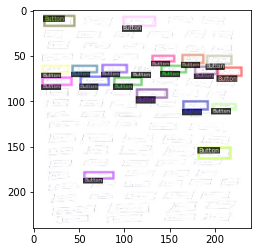

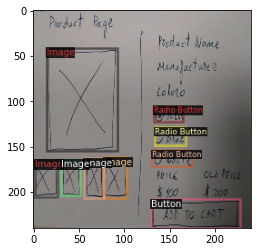

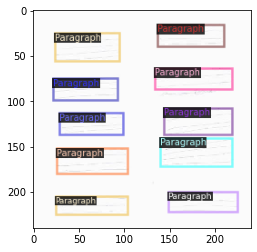

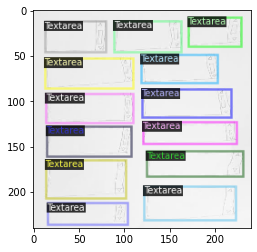

In [5]:
import random

for d in random.sample(train_dataset_dicts, 4):
    img = cv2.imread(d['file_name'], cv2.COLOR_BGR2RGB)
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)  # -1 converts BGR to RGB
    #print(img.shape)
    vis = visualizer.draw_dataset_dict(d)
    #print(vis.get_image())
#     cv2.imshow("image", vis.get_image()[:,:,::-1])
#     cv2.waitKey(0)
    plt.imshow(vis.get_image())
    plt.show()

In [8]:
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
import os


cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("sketches_train",)
cfg.DATASETS.TEST = ("sketches_test",) 
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
# cfg.MODEL.DEVICE = "cpu"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 35000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 14
cfg.OUTPUT_DIR = "output2"

In [9]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

[09/11 18:32:51 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[09/11 18:32:51 d2.data.datasets.coco]: Loaded 1338 images in COCO format from data/train_annotations.coco.json
[09/11 18:32:51 d2.data.build]: Removed 0 images with no usable annotations. 1338 images left.
[09/11 18:32:52 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[09/11 18:32:52 d2.data.build]: Using training sampler TrainingSampler
[09/11 18:32:52 d2.data.common]: Serializing 1338 elements to byte tensors and concatenating them all ...
[09/11 18:32:52 d2.data.common]: Serialized dataset takes 1.28 MiB
WARNING [09/11 18:32:52 d2.solver.build]: SOLVER.STEPS contains values larger than SOLVER.MAX_ITER. These values will be ignored.


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (15, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (56, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (56,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias

In [10]:
trainer.train()

[09/11 18:33:00 d2.engine.train_loop]: Starting training from iteration 0


C:\Users\ASUS\anaconda3\envs\dt_2_new\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/11 18:33:17 d2.utils.events]:  eta: 3:06:59  iter: 19  total_loss: 5.013  loss_cls: 2.873  loss_box_reg: 0.7063  loss_rpn_cls: 1.364  loss_rpn_loc: 0.1986  time: 0.3622  data_time: 0.2856  lr: 1.9981e-05  max_mem: 1988M
[09/11 18:33:24 d2.utils.events]:  eta: 3:06:53  iter: 39  total_loss: 3.47  loss_cls: 2.462  loss_box_reg: 0.8625  loss_rpn_cls: 0.04954  loss_rpn_loc: 0.1008  time: 0.3398  data_time: 0.0010  lr: 3.9961e-05  max_mem: 1988M
[09/11 18:33:30 d2.utils.events]:  eta: 3:09:55  iter: 59  total_loss: 2.703  loss_cls: 1.827  loss_box_reg: 0.8471  loss_rpn_cls: 0.04181  loss_rpn_loc: 0.1026  time: 0.3338  data_time: 0.0010  lr: 5.9941e-05  max_mem: 1988M
[09/11 18:33:37 d2.utils.events]:  eta: 3:09:46  iter: 79  total_loss: 2.264  loss_cls: 1.196  loss_box_reg: 0.883  loss_rpn_cls: 0.05138  loss_rpn_loc: 0.09717  time: 0.3310  data_time: 0.0010  lr: 7.9921e-05  max_mem: 1988M
[09/11 18:33:43 d2.utils.events]:  eta: 3:12:12  iter: 99  total_loss: 2.069  loss_cls: 1.073  loss

[09/11 18:37:07 d2.utils.events]:  eta: 3:09:58  iter: 719  total_loss: 0.7516  loss_cls: 0.2585  loss_box_reg: 0.324  loss_rpn_cls: 0.009513  loss_rpn_loc: 0.08229  time: 0.3286  data_time: 0.0010  lr: 0.00071928  max_mem: 1988M
[09/11 18:37:14 d2.utils.events]:  eta: 3:09:53  iter: 739  total_loss: 0.7573  loss_cls: 0.3154  loss_box_reg: 0.3336  loss_rpn_cls: 0.007479  loss_rpn_loc: 0.0906  time: 0.3286  data_time: 0.0011  lr: 0.00073926  max_mem: 1988M
[09/11 18:37:20 d2.utils.events]:  eta: 3:09:49  iter: 759  total_loss: 0.666  loss_cls: 0.2845  loss_box_reg: 0.3169  loss_rpn_cls: 0.01501  loss_rpn_loc: 0.08009  time: 0.3288  data_time: 0.0011  lr: 0.00075924  max_mem: 1988M
[09/11 18:37:27 d2.utils.events]:  eta: 3:09:39  iter: 779  total_loss: 0.7941  loss_cls: 0.339  loss_box_reg: 0.3567  loss_rpn_cls: 0.01491  loss_rpn_loc: 0.08186  time: 0.3286  data_time: 0.0010  lr: 0.00077922  max_mem: 1988M
[09/11 18:37:34 d2.utils.events]:  eta: 3:09:33  iter: 799  total_loss: 0.749  los

[09/11 18:41:00 d2.utils.events]:  eta: 3:07:08  iter: 1419  total_loss: 0.592  loss_cls: 0.22  loss_box_reg: 0.2668  loss_rpn_cls: 0.006139  loss_rpn_loc: 0.06298  time: 0.3305  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 18:41:07 d2.utils.events]:  eta: 3:06:52  iter: 1439  total_loss: 0.4934  loss_cls: 0.161  loss_box_reg: 0.2533  loss_rpn_cls: 0.007397  loss_rpn_loc: 0.07278  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 18:41:13 d2.utils.events]:  eta: 3:06:47  iter: 1459  total_loss: 0.5802  loss_cls: 0.1998  loss_box_reg: 0.2616  loss_rpn_cls: 0.01264  loss_rpn_loc: 0.09478  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 18:41:20 d2.utils.events]:  eta: 3:06:50  iter: 1479  total_loss: 0.5137  loss_cls: 0.1661  loss_box_reg: 0.2637  loss_rpn_cls: 0.008475  loss_rpn_loc: 0.07512  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 18:41:26 d2.utils.events]:  eta: 3:06:42  iter: 1499  total_loss: 0.5465  loss_cls: 0.1931

[09/11 18:44:52 d2.utils.events]:  eta: 3:03:21  iter: 2119  total_loss: 0.4506  loss_cls: 0.1395  loss_box_reg: 0.2362  loss_rpn_cls: 0.005834  loss_rpn_loc: 0.06212  time: 0.3306  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 18:44:58 d2.utils.events]:  eta: 3:03:14  iter: 2139  total_loss: 0.47  loss_cls: 0.1133  loss_box_reg: 0.243  loss_rpn_cls: 0.009144  loss_rpn_loc: 0.07348  time: 0.3306  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 18:45:05 d2.utils.events]:  eta: 3:03:06  iter: 2159  total_loss: 0.4659  loss_cls: 0.1547  loss_box_reg: 0.2376  loss_rpn_cls: 0.009519  loss_rpn_loc: 0.06432  time: 0.3305  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 18:45:12 d2.utils.events]:  eta: 3:03:01  iter: 2179  total_loss: 0.4412  loss_cls: 0.1398  loss_box_reg: 0.2084  loss_rpn_cls: 0.005528  loss_rpn_loc: 0.06327  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 18:45:18 d2.utils.events]:  eta: 3:02:53  iter: 2199  total_loss: 0.4379  loss_cls: 0.13

[09/11 18:48:44 d2.utils.events]:  eta: 2:59:13  iter: 2819  total_loss: 0.3994  loss_cls: 0.1097  loss_box_reg: 0.1994  loss_rpn_cls: 0.003481  loss_rpn_loc: 0.06573  time: 0.3308  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 18:48:51 d2.utils.events]:  eta: 2:59:05  iter: 2839  total_loss: 0.4217  loss_cls: 0.1257  loss_box_reg: 0.2088  loss_rpn_cls: 0.004357  loss_rpn_loc: 0.05995  time: 0.3308  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 18:48:57 d2.utils.events]:  eta: 2:58:56  iter: 2859  total_loss: 0.4141  loss_cls: 0.1022  loss_box_reg: 0.2039  loss_rpn_cls: 0.008457  loss_rpn_loc: 0.07056  time: 0.3307  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 18:49:04 d2.utils.events]:  eta: 2:58:45  iter: 2879  total_loss: 0.4353  loss_cls: 0.1431  loss_box_reg: 0.2234  loss_rpn_cls: 0.008278  loss_rpn_loc: 0.06146  time: 0.3307  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 18:49:10 d2.utils.events]:  eta: 2:58:44  iter: 2899  total_loss: 0.3953  loss_cls: 0

[09/11 18:52:34 d2.utils.events]:  eta: 2:54:55  iter: 3519  total_loss: 0.2926  loss_cls: 0.08672  loss_box_reg: 0.1724  loss_rpn_cls: 0.003734  loss_rpn_loc: 0.03346  time: 0.3303  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 18:52:41 d2.utils.events]:  eta: 2:54:50  iter: 3539  total_loss: 0.3617  loss_cls: 0.1103  loss_box_reg: 0.2038  loss_rpn_cls: 0.007738  loss_rpn_loc: 0.05377  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 18:52:47 d2.utils.events]:  eta: 2:54:31  iter: 3559  total_loss: 0.41  loss_cls: 0.09418  loss_box_reg: 0.2076  loss_rpn_cls: 0.004935  loss_rpn_loc: 0.06853  time: 0.3303  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 18:52:54 d2.utils.events]:  eta: 2:54:23  iter: 3579  total_loss: 0.3801  loss_cls: 0.09733  loss_box_reg: 0.1927  loss_rpn_cls: 0.004271  loss_rpn_loc: 0.06306  time: 0.3303  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 18:53:01 d2.utils.events]:  eta: 2:54:15  iter: 3599  total_loss: 0.4064  loss_cls: 

[09/11 18:56:25 d2.utils.events]:  eta: 2:50:53  iter: 4219  total_loss: 0.3966  loss_cls: 0.09993  loss_box_reg: 0.1828  loss_rpn_cls: 0.002866  loss_rpn_loc: 0.05199  time: 0.3301  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 18:56:31 d2.utils.events]:  eta: 2:50:46  iter: 4239  total_loss: 0.3876  loss_cls: 0.1054  loss_box_reg: 0.2056  loss_rpn_cls: 0.003524  loss_rpn_loc: 0.04924  time: 0.3301  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 18:56:38 d2.utils.events]:  eta: 2:50:35  iter: 4259  total_loss: 0.3382  loss_cls: 0.1048  loss_box_reg: 0.1888  loss_rpn_cls: 0.003637  loss_rpn_loc: 0.04757  time: 0.3301  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 18:56:44 d2.utils.events]:  eta: 2:50:27  iter: 4279  total_loss: 0.378  loss_cls: 0.104  loss_box_reg: 0.1886  loss_rpn_cls: 0.002828  loss_rpn_loc: 0.06031  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 18:56:51 d2.utils.events]:  eta: 2:50:22  iter: 4299  total_loss: 0.3804  loss_cls: 0.

[09/11 19:00:15 d2.utils.events]:  eta: 2:46:56  iter: 4919  total_loss: 0.3452  loss_cls: 0.09506  loss_box_reg: 0.1998  loss_rpn_cls: 0.00248  loss_rpn_loc: 0.03925  time: 0.3300  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 19:00:22 d2.utils.events]:  eta: 2:46:48  iter: 4939  total_loss: 0.3451  loss_cls: 0.1012  loss_box_reg: 0.1703  loss_rpn_cls: 0.006582  loss_rpn_loc: 0.0559  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:00:29 d2.utils.events]:  eta: 2:46:39  iter: 4959  total_loss: 0.3341  loss_cls: 0.08586  loss_box_reg: 0.1789  loss_rpn_cls: 0.00283  loss_rpn_loc: 0.03674  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:00:35 d2.utils.events]:  eta: 2:46:35  iter: 4979  total_loss: 0.3718  loss_cls: 0.1081  loss_box_reg: 0.1913  loss_rpn_cls: 0.005768  loss_rpn_loc: 0.06602  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:00:42 d2.utils.events]:  eta: 2:46:30  iter: 4999  total_loss: 0.3265  loss_cls: 0.

[09/11 19:04:08 d2.utils.events]:  eta: 2:43:14  iter: 5619  total_loss: 0.3152  loss_cls: 0.08639  loss_box_reg: 0.1698  loss_rpn_cls: 0.004029  loss_rpn_loc: 0.04027  time: 0.3301  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:04:14 d2.utils.events]:  eta: 2:43:04  iter: 5639  total_loss: 0.319  loss_cls: 0.06534  loss_box_reg: 0.1566  loss_rpn_cls: 0.003022  loss_rpn_loc: 0.05144  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:04:20 d2.utils.events]:  eta: 2:42:51  iter: 5659  total_loss: 0.3544  loss_cls: 0.08452  loss_box_reg: 0.1797  loss_rpn_cls: 0.005955  loss_rpn_loc: 0.05169  time: 0.3300  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 19:04:27 d2.utils.events]:  eta: 2:42:42  iter: 5679  total_loss: 0.2921  loss_cls: 0.07258  loss_box_reg: 0.1686  loss_rpn_cls: 0.003452  loss_rpn_loc: 0.05471  time: 0.3300  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 19:04:33 d2.utils.events]:  eta: 2:42:31  iter: 5699  total_loss: 0.3622  loss_cls

[09/11 19:07:58 d2.utils.events]:  eta: 2:39:09  iter: 6319  total_loss: 0.3568  loss_cls: 0.1116  loss_box_reg: 0.1808  loss_rpn_cls: 0.003264  loss_rpn_loc: 0.06271  time: 0.3299  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:08:08 d2.utils.events]:  eta: 2:39:08  iter: 6339  total_loss: 0.3165  loss_cls: 0.08679  loss_box_reg: 0.1678  loss_rpn_cls: 0.003277  loss_rpn_loc: 0.05175  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:08:15 d2.utils.events]:  eta: 2:39:02  iter: 6359  total_loss: 0.3264  loss_cls: 0.0956  loss_box_reg: 0.1654  loss_rpn_cls: 0.002925  loss_rpn_loc: 0.04992  time: 0.3306  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 19:08:22 d2.utils.events]:  eta: 2:38:56  iter: 6379  total_loss: 0.3564  loss_cls: 0.09126  loss_box_reg: 0.1865  loss_rpn_cls: 0.004388  loss_rpn_loc: 0.05279  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:08:29 d2.utils.events]:  eta: 2:38:47  iter: 6399  total_loss: 0.3575  loss_cls:

[09/11 19:11:54 d2.utils.events]:  eta: 2:35:35  iter: 7019  total_loss: 0.3199  loss_cls: 0.08919  loss_box_reg: 0.181  loss_rpn_cls: 0.002297  loss_rpn_loc: 0.04909  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:12:01 d2.utils.events]:  eta: 2:35:19  iter: 7039  total_loss: 0.3138  loss_cls: 0.07019  loss_box_reg: 0.183  loss_rpn_cls: 0.003736  loss_rpn_loc: 0.05778  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:12:08 d2.utils.events]:  eta: 2:35:24  iter: 7059  total_loss: 0.326  loss_cls: 0.09843  loss_box_reg: 0.2077  loss_rpn_cls: 0.003615  loss_rpn_loc: 0.06099  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:12:14 d2.utils.events]:  eta: 2:35:15  iter: 7079  total_loss: 0.311  loss_cls: 0.07793  loss_box_reg: 0.1579  loss_rpn_cls: 0.006673  loss_rpn_loc: 0.06008  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:12:21 d2.utils.events]:  eta: 2:35:09  iter: 7099  total_loss: 0.2962  loss_cls: 0

[09/11 19:15:46 d2.utils.events]:  eta: 2:31:41  iter: 7719  total_loss: 0.2883  loss_cls: 0.07118  loss_box_reg: 0.1469  loss_rpn_cls: 0.003262  loss_rpn_loc: 0.03769  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:15:53 d2.utils.events]:  eta: 2:31:36  iter: 7739  total_loss: 0.2971  loss_cls: 0.07737  loss_box_reg: 0.1639  loss_rpn_cls: 0.003409  loss_rpn_loc: 0.05227  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:15:59 d2.utils.events]:  eta: 2:31:30  iter: 7759  total_loss: 0.3502  loss_cls: 0.09435  loss_box_reg: 0.1655  loss_rpn_cls: 0.004078  loss_rpn_loc: 0.04583  time: 0.3307  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:16:06 d2.utils.events]:  eta: 2:31:24  iter: 7779  total_loss: 0.3013  loss_cls: 0.07519  loss_box_reg: 0.1597  loss_rpn_cls: 0.005051  loss_rpn_loc: 0.05337  time: 0.3307  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:16:13 d2.utils.events]:  eta: 2:31:19  iter: 7799  total_loss: 0.2962  loss_cl

[09/11 19:19:36 d2.utils.events]:  eta: 2:27:39  iter: 8419  total_loss: 0.2803  loss_cls: 0.0742  loss_box_reg: 0.1582  loss_rpn_cls: 0.002536  loss_rpn_loc: 0.03233  time: 0.3305  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:19:43 d2.utils.events]:  eta: 2:27:34  iter: 8439  total_loss: 0.3249  loss_cls: 0.06192  loss_box_reg: 0.1728  loss_rpn_cls: 0.002922  loss_rpn_loc: 0.05345  time: 0.3305  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:19:50 d2.utils.events]:  eta: 2:27:28  iter: 8459  total_loss: 0.3509  loss_cls: 0.08687  loss_box_reg: 0.1744  loss_rpn_cls: 0.003509  loss_rpn_loc: 0.05125  time: 0.3305  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:19:56 d2.utils.events]:  eta: 2:27:20  iter: 8479  total_loss: 0.3072  loss_cls: 0.07538  loss_box_reg: 0.1811  loss_rpn_cls: 0.002219  loss_rpn_loc: 0.04002  time: 0.3305  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:20:03 d2.utils.events]:  eta: 2:27:15  iter: 8499  total_loss: 0.2537  loss_cls

[09/11 19:23:28 d2.utils.events]:  eta: 2:23:32  iter: 9119  total_loss: 0.2957  loss_cls: 0.07508  loss_box_reg: 0.168  loss_rpn_cls: 0.004244  loss_rpn_loc: 0.05325  time: 0.3305  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:23:34 d2.utils.events]:  eta: 2:23:26  iter: 9139  total_loss: 0.3498  loss_cls: 0.1307  loss_box_reg: 0.1625  loss_rpn_cls: 0.004117  loss_rpn_loc: 0.04056  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:23:41 d2.utils.events]:  eta: 2:23:18  iter: 9159  total_loss: 0.2719  loss_cls: 0.05904  loss_box_reg: 0.1455  loss_rpn_cls: 0.002275  loss_rpn_loc: 0.0434  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:23:47 d2.utils.events]:  eta: 2:23:13  iter: 9179  total_loss: 0.2372  loss_cls: 0.04671  loss_box_reg: 0.1477  loss_rpn_cls: 0.002218  loss_rpn_loc: 0.05143  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:23:54 d2.utils.events]:  eta: 2:23:08  iter: 9199  total_loss: 0.2715  loss_cls: 

[09/11 19:27:18 d2.utils.events]:  eta: 2:19:59  iter: 9819  total_loss: 0.259  loss_cls: 0.06975  loss_box_reg: 0.1494  loss_rpn_cls: 0.003658  loss_rpn_loc: 0.03318  time: 0.3303  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:27:24 d2.utils.events]:  eta: 2:19:56  iter: 9839  total_loss: 0.328  loss_cls: 0.08749  loss_box_reg: 0.1679  loss_rpn_cls: 0.002291  loss_rpn_loc: 0.046  time: 0.3303  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:27:31 d2.utils.events]:  eta: 2:19:50  iter: 9859  total_loss: 0.2729  loss_cls: 0.06216  loss_box_reg: 0.1584  loss_rpn_cls: 0.001758  loss_rpn_loc: 0.02854  time: 0.3303  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:27:38 d2.utils.events]:  eta: 2:19:44  iter: 9879  total_loss: 0.3232  loss_cls: 0.09232  loss_box_reg: 0.1696  loss_rpn_cls: 0.006523  loss_rpn_loc: 0.05637  time: 0.3303  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:27:44 d2.utils.events]:  eta: 2:19:38  iter: 9899  total_loss: 0.2552  loss_cls: 0

[09/11 19:31:10 d2.utils.events]:  eta: 2:16:08  iter: 10519  total_loss: 0.3174  loss_cls: 0.0672  loss_box_reg: 0.1712  loss_rpn_cls: 0.004719  loss_rpn_loc: 0.064  time: 0.3303  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:31:16 d2.utils.events]:  eta: 2:15:59  iter: 10539  total_loss: 0.237  loss_cls: 0.08014  loss_box_reg: 0.153  loss_rpn_cls: 0.002052  loss_rpn_loc: 0.03866  time: 0.3303  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:31:23 d2.utils.events]:  eta: 2:15:57  iter: 10559  total_loss: 0.2591  loss_cls: 0.05268  loss_box_reg: 0.1613  loss_rpn_cls: 0.002359  loss_rpn_loc: 0.0409  time: 0.3303  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:31:29 d2.utils.events]:  eta: 2:15:48  iter: 10579  total_loss: 0.2265  loss_cls: 0.04261  loss_box_reg: 0.1342  loss_rpn_cls: 0.001971  loss_rpn_loc: 0.04439  time: 0.3303  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 19:31:36 d2.utils.events]:  eta: 2:15:41  iter: 10599  total_loss: 0.3026  loss_cls

[09/11 19:35:01 d2.utils.events]:  eta: 2:12:00  iter: 11219  total_loss: 0.2639  loss_cls: 0.06118  loss_box_reg: 0.139  loss_rpn_cls: 0.002267  loss_rpn_loc: 0.05115  time: 0.3303  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:35:08 d2.utils.events]:  eta: 2:11:49  iter: 11239  total_loss: 0.2537  loss_cls: 0.06559  loss_box_reg: 0.1537  loss_rpn_cls: 0.001735  loss_rpn_loc: 0.03904  time: 0.3303  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:35:14 d2.utils.events]:  eta: 2:11:43  iter: 11259  total_loss: 0.2523  loss_cls: 0.04267  loss_box_reg: 0.1515  loss_rpn_cls: 0.002106  loss_rpn_loc: 0.05201  time: 0.3303  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:35:21 d2.utils.events]:  eta: 2:11:39  iter: 11279  total_loss: 0.2993  loss_cls: 0.06921  loss_box_reg: 0.1458  loss_rpn_cls: 0.001919  loss_rpn_loc: 0.04291  time: 0.3303  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 19:35:28 d2.utils.events]:  eta: 2:11:35  iter: 11299  total_loss: 0.262  loss

[09/11 19:38:57 d2.utils.events]:  eta: 2:08:48  iter: 11919  total_loss: 0.2542  loss_cls: 0.05398  loss_box_reg: 0.1428  loss_rpn_cls: 0.002004  loss_rpn_loc: 0.03436  time: 0.3306  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 19:39:03 d2.utils.events]:  eta: 2:08:40  iter: 11939  total_loss: 0.2402  loss_cls: 0.05262  loss_box_reg: 0.1392  loss_rpn_cls: 0.002629  loss_rpn_loc: 0.03774  time: 0.3306  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 19:39:10 d2.utils.events]:  eta: 2:08:33  iter: 11959  total_loss: 0.278  loss_cls: 0.05828  loss_box_reg: 0.1593  loss_rpn_cls: 0.002532  loss_rpn_loc: 0.04793  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:39:17 d2.utils.events]:  eta: 2:08:31  iter: 11979  total_loss: 0.3045  loss_cls: 0.0717  loss_box_reg: 0.1718  loss_rpn_cls: 0.003172  loss_rpn_loc: 0.0519  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:39:23 d2.utils.events]:  eta: 2:08:29  iter: 11999  total_loss: 0.2983  loss_

[09/11 19:42:48 d2.utils.events]:  eta: 2:04:42  iter: 12619  total_loss: 0.3084  loss_cls: 0.0805  loss_box_reg: 0.1604  loss_rpn_cls: 0.002374  loss_rpn_loc: 0.04875  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:42:55 d2.utils.events]:  eta: 2:04:35  iter: 12639  total_loss: 0.2496  loss_cls: 0.05266  loss_box_reg: 0.1409  loss_rpn_cls: 0.003078  loss_rpn_loc: 0.05156  time: 0.3306  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:43:01 d2.utils.events]:  eta: 2:04:27  iter: 12659  total_loss: 0.2872  loss_cls: 0.08069  loss_box_reg: 0.1546  loss_rpn_cls: 0.001883  loss_rpn_loc: 0.0373  time: 0.3305  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:43:08 d2.utils.events]:  eta: 2:04:18  iter: 12679  total_loss: 0.2559  loss_cls: 0.0592  loss_box_reg: 0.146  loss_rpn_cls: 0.002287  loss_rpn_loc: 0.04463  time: 0.3305  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:43:14 d2.utils.events]:  eta: 2:04:10  iter: 12699  total_loss: 0.2596  loss_c

[09/11 19:46:39 d2.utils.events]:  eta: 2:00:17  iter: 13319  total_loss: 0.3108  loss_cls: 0.09162  loss_box_reg: 0.173  loss_rpn_cls: 0.001768  loss_rpn_loc: 0.05048  time: 0.3305  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:46:45 d2.utils.events]:  eta: 2:00:08  iter: 13339  total_loss: 0.2328  loss_cls: 0.0513  loss_box_reg: 0.1374  loss_rpn_cls: 0.003403  loss_rpn_loc: 0.04044  time: 0.3305  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:46:51 d2.utils.events]:  eta: 2:00:01  iter: 13359  total_loss: 0.2633  loss_cls: 0.06937  loss_box_reg: 0.1548  loss_rpn_cls: 0.001956  loss_rpn_loc: 0.02115  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:46:58 d2.utils.events]:  eta: 1:59:52  iter: 13379  total_loss: 0.2959  loss_cls: 0.0912  loss_box_reg: 0.1566  loss_rpn_cls: 0.002169  loss_rpn_loc: 0.04139  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:47:05 d2.utils.events]:  eta: 1:59:47  iter: 13399  total_loss: 0.2107  loss_

[09/11 19:50:29 d2.utils.events]:  eta: 1:56:44  iter: 14019  total_loss: 0.2178  loss_cls: 0.06188  loss_box_reg: 0.1267  loss_rpn_cls: 0.001703  loss_rpn_loc: 0.02832  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:50:36 d2.utils.events]:  eta: 1:56:37  iter: 14039  total_loss: 0.2679  loss_cls: 0.07519  loss_box_reg: 0.1451  loss_rpn_cls: 0.001831  loss_rpn_loc: 0.03794  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:50:43 d2.utils.events]:  eta: 1:56:26  iter: 14059  total_loss: 0.2448  loss_cls: 0.05523  loss_box_reg: 0.1497  loss_rpn_cls: 0.001444  loss_rpn_loc: 0.0485  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:50:49 d2.utils.events]:  eta: 1:56:22  iter: 14079  total_loss: 0.2493  loss_cls: 0.05522  loss_box_reg: 0.1613  loss_rpn_cls: 0.002683  loss_rpn_loc: 0.03659  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:50:56 d2.utils.events]:  eta: 1:56:12  iter: 14099  total_loss: 0.2527  los

[09/11 19:54:21 d2.utils.events]:  eta: 1:53:02  iter: 14719  total_loss: 0.257  loss_cls: 0.0596  loss_box_reg: 0.1487  loss_rpn_cls: 0.00209  loss_rpn_loc: 0.03041  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:54:28 d2.utils.events]:  eta: 1:52:54  iter: 14739  total_loss: 0.2424  loss_cls: 0.05391  loss_box_reg: 0.1339  loss_rpn_cls: 0.001549  loss_rpn_loc: 0.03827  time: 0.3304  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 19:54:34 d2.utils.events]:  eta: 1:52:43  iter: 14759  total_loss: 0.3  loss_cls: 0.07654  loss_box_reg: 0.1552  loss_rpn_cls: 0.003283  loss_rpn_loc: 0.04303  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:54:41 d2.utils.events]:  eta: 1:52:40  iter: 14779  total_loss: 0.2424  loss_cls: 0.05951  loss_box_reg: 0.1397  loss_rpn_cls: 0.00444  loss_rpn_loc: 0.03648  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:54:48 d2.utils.events]:  eta: 1:52:28  iter: 14799  total_loss: 0.2865  loss_cls:

[09/11 19:58:13 d2.utils.events]:  eta: 1:48:46  iter: 15419  total_loss: 0.2848  loss_cls: 0.06164  loss_box_reg: 0.1464  loss_rpn_cls: 0.004014  loss_rpn_loc: 0.04628  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:58:20 d2.utils.events]:  eta: 1:48:35  iter: 15439  total_loss: 0.2574  loss_cls: 0.05619  loss_box_reg: 0.14  loss_rpn_cls: 0.002106  loss_rpn_loc: 0.03867  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:58:27 d2.utils.events]:  eta: 1:48:32  iter: 15459  total_loss: 0.3131  loss_cls: 0.08296  loss_box_reg: 0.1506  loss_rpn_cls: 0.005154  loss_rpn_loc: 0.04421  time: 0.3304  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 19:58:33 d2.utils.events]:  eta: 1:48:20  iter: 15479  total_loss: 0.2601  loss_cls: 0.05771  loss_box_reg: 0.1266  loss_rpn_cls: 0.00196  loss_rpn_loc: 0.04257  time: 0.3304  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 19:58:42 d2.utils.events]:  eta: 1:48:19  iter: 15499  total_loss: 0.3029  loss_

[09/11 20:02:23 d2.utils.events]:  eta: 1:45:57  iter: 16119  total_loss: 0.2874  loss_cls: 0.06949  loss_box_reg: 0.1521  loss_rpn_cls: 0.002855  loss_rpn_loc: 0.04744  time: 0.3316  data_time: 0.0010  lr: 0.001  max_mem: 1988M
[09/11 20:02:32 d2.utils.events]:  eta: 1:45:51  iter: 16139  total_loss: 0.228  loss_cls: 0.06174  loss_box_reg: 0.129  loss_rpn_cls: 0.001865  loss_rpn_loc: 0.0407  time: 0.3317  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:02:39 d2.utils.events]:  eta: 1:45:42  iter: 16159  total_loss: 0.2561  loss_cls: 0.0481  loss_box_reg: 0.1534  loss_rpn_cls: 0.00282  loss_rpn_loc: 0.0502  time: 0.3317  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:02:45 d2.utils.events]:  eta: 1:45:27  iter: 16179  total_loss: 0.2621  loss_cls: 0.0587  loss_box_reg: 0.1397  loss_rpn_cls: 0.001869  loss_rpn_loc: 0.0345  time: 0.3317  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:02:52 d2.utils.events]:  eta: 1:45:20  iter: 16199  total_loss: 0.2185  loss_cls: 

[09/11 20:06:17 d2.utils.events]:  eta: 1:41:00  iter: 16819  total_loss: 0.2412  loss_cls: 0.06675  loss_box_reg: 0.1221  loss_rpn_cls: 0.00258  loss_rpn_loc: 0.04187  time: 0.3317  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:06:24 d2.utils.events]:  eta: 1:40:57  iter: 16839  total_loss: 0.2578  loss_cls: 0.05381  loss_box_reg: 0.1441  loss_rpn_cls: 0.001957  loss_rpn_loc: 0.04332  time: 0.3317  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:06:30 d2.utils.events]:  eta: 1:40:47  iter: 16859  total_loss: 0.2454  loss_cls: 0.04701  loss_box_reg: 0.1259  loss_rpn_cls: 0.003178  loss_rpn_loc: 0.04364  time: 0.3317  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:06:37 d2.utils.events]:  eta: 1:40:39  iter: 16879  total_loss: 0.207  loss_cls: 0.03899  loss_box_reg: 0.128  loss_rpn_cls: 0.002172  loss_rpn_loc: 0.03217  time: 0.3317  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:06:43 d2.utils.events]:  eta: 1:40:30  iter: 16899  total_loss: 0.2362  loss_

[09/11 20:10:10 d2.utils.events]:  eta: 1:37:16  iter: 17519  total_loss: 0.2674  loss_cls: 0.06943  loss_box_reg: 0.1293  loss_rpn_cls: 0.002059  loss_rpn_loc: 0.0439  time: 0.3317  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:10:16 d2.utils.events]:  eta: 1:37:09  iter: 17539  total_loss: 0.2554  loss_cls: 0.0618  loss_box_reg: 0.1363  loss_rpn_cls: 0.002653  loss_rpn_loc: 0.03963  time: 0.3317  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:10:23 d2.utils.events]:  eta: 1:37:02  iter: 17559  total_loss: 0.248  loss_cls: 0.05734  loss_box_reg: 0.1264  loss_rpn_cls: 0.001402  loss_rpn_loc: 0.02984  time: 0.3317  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:10:29 d2.utils.events]:  eta: 1:36:59  iter: 17579  total_loss: 0.2766  loss_cls: 0.0675  loss_box_reg: 0.1384  loss_rpn_cls: 0.003564  loss_rpn_loc: 0.04367  time: 0.3317  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:10:36 d2.utils.events]:  eta: 1:36:53  iter: 17599  total_loss: 0.2399  loss_c

[09/11 20:15:09 d2.utils.events]:  eta: 1:34:01  iter: 18219  total_loss: 0.236  loss_cls: 0.04846  loss_box_reg: 0.133  loss_rpn_cls: 0.003097  loss_rpn_loc: 0.03819  time: 0.3354  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:15:16 d2.utils.events]:  eta: 1:33:53  iter: 18239  total_loss: 0.2203  loss_cls: 0.0454  loss_box_reg: 0.1484  loss_rpn_cls: 0.001475  loss_rpn_loc: 0.03713  time: 0.3354  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:15:23 d2.utils.events]:  eta: 1:33:48  iter: 18259  total_loss: 0.2558  loss_cls: 0.06505  loss_box_reg: 0.163  loss_rpn_cls: 0.003553  loss_rpn_loc: 0.0439  time: 0.3354  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:15:29 d2.utils.events]:  eta: 1:33:42  iter: 18279  total_loss: 0.221  loss_cls: 0.06706  loss_box_reg: 0.1287  loss_rpn_cls: 0.001253  loss_rpn_loc: 0.03071  time: 0.3354  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:15:36 d2.utils.events]:  eta: 1:33:37  iter: 18299  total_loss: 0.2145  loss_cls

[09/11 20:20:48 d2.utils.events]:  eta: 1:36:48  iter: 18919  total_loss: 0.2158  loss_cls: 0.03707  loss_box_reg: 0.1314  loss_rpn_cls: 0.001862  loss_rpn_loc: 0.04145  time: 0.3409  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:20:55 d2.utils.events]:  eta: 1:36:40  iter: 18939  total_loss: 0.2333  loss_cls: 0.05794  loss_box_reg: 0.1301  loss_rpn_cls: 0.001889  loss_rpn_loc: 0.04049  time: 0.3409  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:21:01 d2.utils.events]:  eta: 1:36:30  iter: 18959  total_loss: 0.2681  loss_cls: 0.0658  loss_box_reg: 0.1443  loss_rpn_cls: 0.002383  loss_rpn_loc: 0.03931  time: 0.3408  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:21:12 d2.utils.events]:  eta: 1:36:27  iter: 18979  total_loss: 0.2439  loss_cls: 0.05025  loss_box_reg: 0.1382  loss_rpn_cls: 0.002812  loss_rpn_loc: 0.04406  time: 0.3410  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:21:19 d2.utils.events]:  eta: 1:36:26  iter: 18999  total_loss: 0.2359  los

[09/11 20:27:41 d2.utils.events]:  eta: 1:54:17  iter: 19619  total_loss: 0.2643  loss_cls: 0.07631  loss_box_reg: 0.1392  loss_rpn_cls: 0.00191  loss_rpn_loc: 0.04051  time: 0.3497  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:27:53 d2.utils.events]:  eta: 1:54:29  iter: 19639  total_loss: 0.2117  loss_cls: 0.03627  loss_box_reg: 0.1286  loss_rpn_cls: 0.003422  loss_rpn_loc: 0.04608  time: 0.3500  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:28:04 d2.utils.events]:  eta: 1:54:35  iter: 19659  total_loss: 0.246  loss_cls: 0.06031  loss_box_reg: 0.145  loss_rpn_cls: 0.002306  loss_rpn_loc: 0.03994  time: 0.3502  data_time: 0.0013  lr: 0.001  max_mem: 1988M
[09/11 20:28:15 d2.utils.events]:  eta: 1:54:42  iter: 19679  total_loss: 0.2572  loss_cls: 0.0604  loss_box_reg: 0.1267  loss_rpn_cls: 0.001899  loss_rpn_loc: 0.04363  time: 0.3504  data_time: 0.0013  lr: 0.001  max_mem: 1988M
[09/11 20:28:25 d2.utils.events]:  eta: 1:54:36  iter: 19699  total_loss: 0.2386  loss_c

[09/11 20:32:23 d2.utils.events]:  eta: 1:29:22  iter: 20319  total_loss: 0.2583  loss_cls: 0.04919  loss_box_reg: 0.1548  loss_rpn_cls: 0.001475  loss_rpn_loc: 0.04591  time: 0.3515  data_time: 0.0014  lr: 0.001  max_mem: 1988M
[09/11 20:32:35 d2.utils.events]:  eta: 1:29:17  iter: 20339  total_loss: 0.2636  loss_cls: 0.07482  loss_box_reg: 0.143  loss_rpn_cls: 0.001473  loss_rpn_loc: 0.04118  time: 0.3518  data_time: 0.0013  lr: 0.001  max_mem: 1988M
[09/11 20:32:46 d2.utils.events]:  eta: 1:29:10  iter: 20359  total_loss: 0.2448  loss_cls: 0.07381  loss_box_reg: 0.1235  loss_rpn_cls: 0.001531  loss_rpn_loc: 0.03329  time: 0.3520  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:32:59 d2.utils.events]:  eta: 1:29:03  iter: 20379  total_loss: 0.2551  loss_cls: 0.08129  loss_box_reg: 0.1317  loss_rpn_cls: 0.001703  loss_rpn_loc: 0.04545  time: 0.3522  data_time: 0.0013  lr: 0.001  max_mem: 1988M
[09/11 20:33:10 d2.utils.events]:  eta: 1:28:56  iter: 20399  total_loss: 0.2371  los

[09/11 20:37:53 d2.utils.events]:  eta: 1:24:37  iter: 21019  total_loss: 0.2537  loss_cls: 0.04926  loss_box_reg: 0.1509  loss_rpn_cls: 0.001251  loss_rpn_loc: 0.04547  time: 0.3555  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:37:59 d2.utils.events]:  eta: 1:24:30  iter: 21039  total_loss: 0.2511  loss_cls: 0.06876  loss_box_reg: 0.1345  loss_rpn_cls: 0.002225  loss_rpn_loc: 0.04801  time: 0.3555  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:38:06 d2.utils.events]:  eta: 1:24:24  iter: 21059  total_loss: 0.2774  loss_cls: 0.06055  loss_box_reg: 0.1581  loss_rpn_cls: 0.002855  loss_rpn_loc: 0.05574  time: 0.3554  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:38:13 d2.utils.events]:  eta: 1:24:19  iter: 21079  total_loss: 0.2197  loss_cls: 0.04401  loss_box_reg: 0.1377  loss_rpn_cls: 0.001926  loss_rpn_loc: 0.02936  time: 0.3554  data_time: 0.0015  lr: 0.001  max_mem: 1988M
[09/11 20:38:20 d2.utils.events]:  eta: 1:24:15  iter: 21099  total_loss: 0.2195  lo

[09/11 20:41:44 d2.utils.events]:  eta: 1:13:46  iter: 21719  total_loss: 0.2544  loss_cls: 0.06309  loss_box_reg: 0.1268  loss_rpn_cls: 0.001793  loss_rpn_loc: 0.02779  time: 0.3547  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:41:51 d2.utils.events]:  eta: 1:13:37  iter: 21739  total_loss: 0.2091  loss_cls: 0.03378  loss_box_reg: 0.121  loss_rpn_cls: 0.001319  loss_rpn_loc: 0.02598  time: 0.3546  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:41:57 d2.utils.events]:  eta: 1:13:30  iter: 21759  total_loss: 0.2247  loss_cls: 0.06439  loss_box_reg: 0.1274  loss_rpn_cls: 0.001695  loss_rpn_loc: 0.03208  time: 0.3546  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:42:03 d2.utils.events]:  eta: 1:13:22  iter: 21779  total_loss: 0.1882  loss_cls: 0.04136  loss_box_reg: 0.114  loss_rpn_cls: 0.001636  loss_rpn_loc: 0.041  time: 0.3546  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:42:10 d2.utils.events]:  eta: 1:13:14  iter: 21799  total_loss: 0.2225  loss_c

[09/11 20:45:34 d2.utils.events]:  eta: 1:09:41  iter: 22419  total_loss: 0.2525  loss_cls: 0.05284  loss_box_reg: 0.1402  loss_rpn_cls: 0.001628  loss_rpn_loc: 0.03946  time: 0.3538  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:45:40 d2.utils.events]:  eta: 1:09:35  iter: 22439  total_loss: 0.1994  loss_cls: 0.05062  loss_box_reg: 0.126  loss_rpn_cls: 0.0011  loss_rpn_loc: 0.02935  time: 0.3538  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:45:47 d2.utils.events]:  eta: 1:09:27  iter: 22459  total_loss: 0.205  loss_cls: 0.05725  loss_box_reg: 0.1085  loss_rpn_cls: 0.002238  loss_rpn_loc: 0.03954  time: 0.3538  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:45:53 d2.utils.events]:  eta: 1:09:19  iter: 22479  total_loss: 0.239  loss_cls: 0.0485  loss_box_reg: 0.1397  loss_rpn_cls: 0.002344  loss_rpn_loc: 0.0441  time: 0.3538  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:46:00 d2.utils.events]:  eta: 1:09:14  iter: 22499  total_loss: 0.2197  loss_cls:

[09/11 20:49:25 d2.utils.events]:  eta: 1:05:58  iter: 23119  total_loss: 0.2322  loss_cls: 0.05232  loss_box_reg: 0.128  loss_rpn_cls: 0.002768  loss_rpn_loc: 0.03942  time: 0.3531  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:49:32 d2.utils.events]:  eta: 1:05:50  iter: 23139  total_loss: 0.2454  loss_cls: 0.06292  loss_box_reg: 0.1322  loss_rpn_cls: 0.001472  loss_rpn_loc: 0.03593  time: 0.3531  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:49:38 d2.utils.events]:  eta: 1:05:42  iter: 23159  total_loss: 0.2551  loss_cls: 0.04293  loss_box_reg: 0.1445  loss_rpn_cls: 0.002555  loss_rpn_loc: 0.04012  time: 0.3531  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:49:45 d2.utils.events]:  eta: 1:05:30  iter: 23179  total_loss: 0.2579  loss_cls: 0.05703  loss_box_reg: 0.1335  loss_rpn_cls: 0.001512  loss_rpn_loc: 0.04109  time: 0.3530  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 20:49:51 d2.utils.events]:  eta: 1:05:27  iter: 23199  total_loss: 0.2266  los

[09/11 20:54:49 d2.utils.events]:  eta: 1:07:49  iter: 23819  total_loss: 0.2508  loss_cls: 0.0574  loss_box_reg: 0.136  loss_rpn_cls: 0.002277  loss_rpn_loc: 0.04353  time: 0.3563  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:54:55 d2.utils.events]:  eta: 1:07:43  iter: 23839  total_loss: 0.2205  loss_cls: 0.04386  loss_box_reg: 0.1214  loss_rpn_cls: 0.001745  loss_rpn_loc: 0.0377  time: 0.3563  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:55:02 d2.utils.events]:  eta: 1:07:36  iter: 23859  total_loss: 0.2225  loss_cls: 0.0394  loss_box_reg: 0.129  loss_rpn_cls: 0.002552  loss_rpn_loc: 0.04098  time: 0.3563  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:55:09 d2.utils.events]:  eta: 1:07:31  iter: 23879  total_loss: 0.2066  loss_cls: 0.04089  loss_box_reg: 0.1212  loss_rpn_cls: 0.001224  loss_rpn_loc: 0.0324  time: 0.3563  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:55:15 d2.utils.events]:  eta: 1:07:21  iter: 23899  total_loss: 0.2345  loss_cls

[09/11 20:58:39 d2.utils.events]:  eta: 0:58:57  iter: 24519  total_loss: 0.2398  loss_cls: 0.05691  loss_box_reg: 0.1221  loss_rpn_cls: 0.004705  loss_rpn_loc: 0.037  time: 0.3555  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:58:45 d2.utils.events]:  eta: 0:58:45  iter: 24539  total_loss: 0.2127  loss_cls: 0.0347  loss_box_reg: 0.13  loss_rpn_cls: 0.002387  loss_rpn_loc: 0.03664  time: 0.3555  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:58:52 d2.utils.events]:  eta: 0:58:29  iter: 24559  total_loss: 0.2426  loss_cls: 0.06868  loss_box_reg: 0.1385  loss_rpn_cls: 0.001502  loss_rpn_loc: 0.03373  time: 0.3555  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:58:59 d2.utils.events]:  eta: 0:58:17  iter: 24579  total_loss: 0.2467  loss_cls: 0.06474  loss_box_reg: 0.1258  loss_rpn_cls: 0.001394  loss_rpn_loc: 0.03366  time: 0.3554  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 20:59:05 d2.utils.events]:  eta: 0:58:04  iter: 24599  total_loss: 0.2371  loss_cl

[09/11 21:02:30 d2.utils.events]:  eta: 0:54:16  iter: 25219  total_loss: 0.2293  loss_cls: 0.05806  loss_box_reg: 0.1286  loss_rpn_cls: 0.001914  loss_rpn_loc: 0.03526  time: 0.3548  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:02:37 d2.utils.events]:  eta: 0:54:12  iter: 25239  total_loss: 0.2256  loss_cls: 0.06464  loss_box_reg: 0.1279  loss_rpn_cls: 0.00176  loss_rpn_loc: 0.03361  time: 0.3548  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:02:44 d2.utils.events]:  eta: 0:54:05  iter: 25259  total_loss: 0.244  loss_cls: 0.06283  loss_box_reg: 0.1323  loss_rpn_cls: 0.001388  loss_rpn_loc: 0.0347  time: 0.3548  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:02:50 d2.utils.events]:  eta: 0:53:58  iter: 25279  total_loss: 0.2078  loss_cls: 0.0592  loss_box_reg: 0.1176  loss_rpn_cls: 0.001623  loss_rpn_loc: 0.01906  time: 0.3547  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:02:57 d2.utils.events]:  eta: 0:53:51  iter: 25299  total_loss: 0.2018  loss_c

[09/11 21:06:21 d2.utils.events]:  eta: 0:50:28  iter: 25919  total_loss: 0.2069  loss_cls: 0.05189  loss_box_reg: 0.136  loss_rpn_cls: 0.001527  loss_rpn_loc: 0.03391  time: 0.3541  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:06:28 d2.utils.events]:  eta: 0:50:20  iter: 25939  total_loss: 0.2125  loss_cls: 0.03412  loss_box_reg: 0.1313  loss_rpn_cls: 0.001474  loss_rpn_loc: 0.04072  time: 0.3541  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:06:35 d2.utils.events]:  eta: 0:50:13  iter: 25959  total_loss: 0.1923  loss_cls: 0.03734  loss_box_reg: 0.1266  loss_rpn_cls: 0.0008469  loss_rpn_loc: 0.03895  time: 0.3541  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:06:41 d2.utils.events]:  eta: 0:50:07  iter: 25979  total_loss: 0.2239  loss_cls: 0.05274  loss_box_reg: 0.1354  loss_rpn_cls: 0.002029  loss_rpn_loc: 0.03917  time: 0.3541  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:06:48 d2.utils.events]:  eta: 0:50:00  iter: 25999  total_loss: 0.2218  lo

[09/11 21:10:12 d2.utils.events]:  eta: 0:46:32  iter: 26619  total_loss: 0.2492  loss_cls: 0.06035  loss_box_reg: 0.1306  loss_rpn_cls: 0.002369  loss_rpn_loc: 0.03588  time: 0.3535  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:10:18 d2.utils.events]:  eta: 0:46:25  iter: 26639  total_loss: 0.2184  loss_cls: 0.05292  loss_box_reg: 0.1247  loss_rpn_cls: 0.001236  loss_rpn_loc: 0.02832  time: 0.3534  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:10:25 d2.utils.events]:  eta: 0:46:19  iter: 26659  total_loss: 0.2229  loss_cls: 0.07062  loss_box_reg: 0.1218  loss_rpn_cls: 0.001129  loss_rpn_loc: 0.02621  time: 0.3534  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:10:31 d2.utils.events]:  eta: 0:46:11  iter: 26679  total_loss: 0.2026  loss_cls: 0.04522  loss_box_reg: 0.1221  loss_rpn_cls: 0.001327  loss_rpn_loc: 0.03112  time: 0.3534  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:10:38 d2.utils.events]:  eta: 0:46:05  iter: 26699  total_loss: 0.2018  lo

[09/11 21:14:02 d2.utils.events]:  eta: 0:42:37  iter: 27319  total_loss: 0.2258  loss_cls: 0.05161  loss_box_reg: 0.1326  loss_rpn_cls: 0.001516  loss_rpn_loc: 0.03373  time: 0.3528  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:14:09 d2.utils.events]:  eta: 0:42:30  iter: 27339  total_loss: 0.21  loss_cls: 0.03857  loss_box_reg: 0.1218  loss_rpn_cls: 0.00225  loss_rpn_loc: 0.02832  time: 0.3528  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:14:16 d2.utils.events]:  eta: 0:42:24  iter: 27359  total_loss: 0.2392  loss_cls: 0.0481  loss_box_reg: 0.1356  loss_rpn_cls: 0.002009  loss_rpn_loc: 0.03568  time: 0.3528  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:14:22 d2.utils.events]:  eta: 0:42:16  iter: 27379  total_loss: 0.284  loss_cls: 0.08367  loss_box_reg: 0.1378  loss_rpn_cls: 0.002156  loss_rpn_loc: 0.04198  time: 0.3528  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:14:29 d2.utils.events]:  eta: 0:42:11  iter: 27399  total_loss: 0.2183  loss_cl

[09/11 21:17:54 d2.utils.events]:  eta: 0:38:50  iter: 28019  total_loss: 0.2547  loss_cls: 0.05152  loss_box_reg: 0.1325  loss_rpn_cls: 0.003169  loss_rpn_loc: 0.03723  time: 0.3523  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:18:01 d2.utils.events]:  eta: 0:38:43  iter: 28039  total_loss: 0.2106  loss_cls: 0.04179  loss_box_reg: 0.1318  loss_rpn_cls: 0.001064  loss_rpn_loc: 0.03975  time: 0.3523  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:18:08 d2.utils.events]:  eta: 0:38:37  iter: 28059  total_loss: 0.2047  loss_cls: 0.03823  loss_box_reg: 0.1217  loss_rpn_cls: 0.0009626  loss_rpn_loc: 0.033  time: 0.3523  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:18:14 d2.utils.events]:  eta: 0:38:30  iter: 28079  total_loss: 0.2324  loss_cls: 0.04966  loss_box_reg: 0.141  loss_rpn_cls: 0.001952  loss_rpn_loc: 0.0385  time: 0.3522  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:18:21 d2.utils.events]:  eta: 0:38:23  iter: 28099  total_loss: 0.1943  loss_

[09/11 21:21:45 d2.utils.events]:  eta: 0:34:55  iter: 28719  total_loss: 0.2466  loss_cls: 0.06984  loss_box_reg: 0.1331  loss_rpn_cls: 0.001276  loss_rpn_loc: 0.04033  time: 0.3517  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:21:51 d2.utils.events]:  eta: 0:34:48  iter: 28739  total_loss: 0.1948  loss_cls: 0.03253  loss_box_reg: 0.1198  loss_rpn_cls: 0.002021  loss_rpn_loc: 0.0354  time: 0.3517  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:21:58 d2.utils.events]:  eta: 0:34:42  iter: 28759  total_loss: 0.2355  loss_cls: 0.0518  loss_box_reg: 0.1314  loss_rpn_cls: 0.00127  loss_rpn_loc: 0.03179  time: 0.3517  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:22:04 d2.utils.events]:  eta: 0:34:35  iter: 28779  total_loss: 0.2353  loss_cls: 0.05338  loss_box_reg: 0.1253  loss_rpn_cls: 0.00118  loss_rpn_loc: 0.03824  time: 0.3517  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:22:11 d2.utils.events]:  eta: 0:34:29  iter: 28799  total_loss: 0.2035  loss_c

[09/11 21:25:36 d2.utils.events]:  eta: 0:31:01  iter: 29419  total_loss: 0.2122  loss_cls: 0.04504  loss_box_reg: 0.1315  loss_rpn_cls: 0.001872  loss_rpn_loc: 0.0344  time: 0.3512  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:25:42 d2.utils.events]:  eta: 0:30:54  iter: 29439  total_loss: 0.2022  loss_cls: 0.05592  loss_box_reg: 0.1072  loss_rpn_cls: 0.002294  loss_rpn_loc: 0.03942  time: 0.3512  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:25:49 d2.utils.events]:  eta: 0:30:47  iter: 29459  total_loss: 0.2317  loss_cls: 0.06463  loss_box_reg: 0.1151  loss_rpn_cls: 0.001425  loss_rpn_loc: 0.03558  time: 0.3512  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:25:55 d2.utils.events]:  eta: 0:30:40  iter: 29479  total_loss: 0.2114  loss_cls: 0.04153  loss_box_reg: 0.1243  loss_rpn_cls: 0.002044  loss_rpn_loc: 0.03001  time: 0.3511  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:26:02 d2.utils.events]:  eta: 0:30:33  iter: 29499  total_loss: 0.2063  los

[09/11 21:29:27 d2.utils.events]:  eta: 0:27:06  iter: 30119  total_loss: 0.1966  loss_cls: 0.05932  loss_box_reg: 0.1251  loss_rpn_cls: 0.002055  loss_rpn_loc: 0.0335  time: 0.3507  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:29:33 d2.utils.events]:  eta: 0:26:59  iter: 30139  total_loss: 0.2004  loss_cls: 0.0561  loss_box_reg: 0.1226  loss_rpn_cls: 0.002489  loss_rpn_loc: 0.03212  time: 0.3506  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:29:40 d2.utils.events]:  eta: 0:26:51  iter: 30159  total_loss: 0.2033  loss_cls: 0.04766  loss_box_reg: 0.1139  loss_rpn_cls: 0.0009304  loss_rpn_loc: 0.02294  time: 0.3506  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:29:46 d2.utils.events]:  eta: 0:26:44  iter: 30179  total_loss: 0.1854  loss_cls: 0.05828  loss_box_reg: 0.1046  loss_rpn_cls: 0.001963  loss_rpn_loc: 0.02982  time: 0.3506  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:29:53 d2.utils.events]:  eta: 0:26:37  iter: 30199  total_loss: 0.2277  los

[09/11 21:33:15 d2.utils.events]:  eta: 0:23:03  iter: 30819  total_loss: 0.1701  loss_cls: 0.03878  loss_box_reg: 0.1069  loss_rpn_cls: 0.0008255  loss_rpn_loc: 0.014  time: 0.3501  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:33:22 d2.utils.events]:  eta: 0:22:58  iter: 30839  total_loss: 0.2459  loss_cls: 0.0724  loss_box_reg: 0.1356  loss_rpn_cls: 0.002194  loss_rpn_loc: 0.03769  time: 0.3501  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:33:29 d2.utils.events]:  eta: 0:22:53  iter: 30859  total_loss: 0.217  loss_cls: 0.04401  loss_box_reg: 0.1368  loss_rpn_cls: 0.001171  loss_rpn_loc: 0.03155  time: 0.3501  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:33:35 d2.utils.events]:  eta: 0:22:46  iter: 30879  total_loss: 0.2391  loss_cls: 0.05874  loss_box_reg: 0.1269  loss_rpn_cls: 0.001164  loss_rpn_loc: 0.04105  time: 0.3501  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:33:42 d2.utils.events]:  eta: 0:22:39  iter: 30899  total_loss: 0.2251  loss_

[09/11 21:37:09 d2.utils.events]:  eta: 0:19:19  iter: 31519  total_loss: 0.1833  loss_cls: 0.04483  loss_box_reg: 0.1169  loss_rpn_cls: 0.001854  loss_rpn_loc: 0.02822  time: 0.3497  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:37:16 d2.utils.events]:  eta: 0:19:13  iter: 31539  total_loss: 0.2433  loss_cls: 0.06934  loss_box_reg: 0.1299  loss_rpn_cls: 0.0009248  loss_rpn_loc: 0.02679  time: 0.3497  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:37:22 d2.utils.events]:  eta: 0:19:07  iter: 31559  total_loss: 0.1715  loss_cls: 0.02544  loss_box_reg: 0.1118  loss_rpn_cls: 0.001208  loss_rpn_loc: 0.02851  time: 0.3497  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:37:29 d2.utils.events]:  eta: 0:19:01  iter: 31579  total_loss: 0.194  loss_cls: 0.04191  loss_box_reg: 0.1129  loss_rpn_cls: 0.001588  loss_rpn_loc: 0.03616  time: 0.3497  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:37:36 d2.utils.events]:  eta: 0:18:55  iter: 31599  total_loss: 0.1897  lo

[09/11 21:41:03 d2.utils.events]:  eta: 0:15:33  iter: 32219  total_loss: 0.155  loss_cls: 0.02976  loss_box_reg: 0.1075  loss_rpn_cls: 0.0006049  loss_rpn_loc: 0.01844  time: 0.3494  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:41:10 d2.utils.events]:  eta: 0:15:26  iter: 32239  total_loss: 0.1878  loss_cls: 0.04195  loss_box_reg: 0.1121  loss_rpn_cls: 0.0009584  loss_rpn_loc: 0.03245  time: 0.3494  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:41:16 d2.utils.events]:  eta: 0:15:20  iter: 32259  total_loss: 0.2025  loss_cls: 0.04807  loss_box_reg: 0.1171  loss_rpn_cls: 0.001871  loss_rpn_loc: 0.03917  time: 0.3494  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:41:23 d2.utils.events]:  eta: 0:15:13  iter: 32279  total_loss: 0.2102  loss_cls: 0.02781  loss_box_reg: 0.1225  loss_rpn_cls: 0.001973  loss_rpn_loc: 0.04164  time: 0.3494  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:41:29 d2.utils.events]:  eta: 0:15:06  iter: 32299  total_loss: 0.1962  l

[09/11 21:44:55 d2.utils.events]:  eta: 0:11:36  iter: 32919  total_loss: 0.2135  loss_cls: 0.03958  loss_box_reg: 0.1281  loss_rpn_cls: 0.002071  loss_rpn_loc: 0.03981  time: 0.3490  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:45:02 d2.utils.events]:  eta: 0:11:29  iter: 32939  total_loss: 0.2313  loss_cls: 0.0603  loss_box_reg: 0.1217  loss_rpn_cls: 0.001242  loss_rpn_loc: 0.02951  time: 0.3490  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:45:08 d2.utils.events]:  eta: 0:11:22  iter: 32959  total_loss: 0.2326  loss_cls: 0.04617  loss_box_reg: 0.1301  loss_rpn_cls: 0.002026  loss_rpn_loc: 0.03438  time: 0.3490  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:45:15 d2.utils.events]:  eta: 0:11:16  iter: 32979  total_loss: 0.2248  loss_cls: 0.03652  loss_box_reg: 0.1269  loss_rpn_cls: 0.001252  loss_rpn_loc: 0.03695  time: 0.3490  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:45:22 d2.utils.events]:  eta: 0:11:09  iter: 32999  total_loss: 0.2194  los

[09/11 21:48:46 d2.utils.events]:  eta: 0:07:40  iter: 33619  total_loss: 0.2355  loss_cls: 0.06678  loss_box_reg: 0.1295  loss_rpn_cls: 0.001612  loss_rpn_loc: 0.03346  time: 0.3486  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:48:53 d2.utils.events]:  eta: 0:07:33  iter: 33639  total_loss: 0.2089  loss_cls: 0.05009  loss_box_reg: 0.114  loss_rpn_cls: 0.002084  loss_rpn_loc: 0.03755  time: 0.3486  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:49:00 d2.utils.events]:  eta: 0:07:27  iter: 33659  total_loss: 0.2604  loss_cls: 0.06471  loss_box_reg: 0.1164  loss_rpn_cls: 0.00119  loss_rpn_loc: 0.04406  time: 0.3486  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:49:06 d2.utils.events]:  eta: 0:07:20  iter: 33679  total_loss: 0.2195  loss_cls: 0.04476  loss_box_reg: 0.1383  loss_rpn_cls: 0.001527  loss_rpn_loc: 0.03771  time: 0.3486  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:49:13 d2.utils.events]:  eta: 0:07:14  iter: 33699  total_loss: 0.2386  loss

[09/11 21:52:38 d2.utils.events]:  eta: 0:03:47  iter: 34319  total_loss: 0.2154  loss_cls: 0.04435  loss_box_reg: 0.1208  loss_rpn_cls: 0.001417  loss_rpn_loc: 0.04371  time: 0.3483  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:52:45 d2.utils.events]:  eta: 0:03:40  iter: 34339  total_loss: 0.1927  loss_cls: 0.03593  loss_box_reg: 0.1173  loss_rpn_cls: 0.001265  loss_rpn_loc: 0.03606  time: 0.3482  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:52:51 d2.utils.events]:  eta: 0:03:34  iter: 34359  total_loss: 0.2379  loss_cls: 0.05132  loss_box_reg: 0.144  loss_rpn_cls: 0.002255  loss_rpn_loc: 0.04103  time: 0.3482  data_time: 0.0012  lr: 0.001  max_mem: 1988M
[09/11 21:52:58 d2.utils.events]:  eta: 0:03:27  iter: 34379  total_loss: 0.213  loss_cls: 0.04633  loss_box_reg: 0.1221  loss_rpn_cls: 0.00176  loss_rpn_loc: 0.03868  time: 0.3482  data_time: 0.0011  lr: 0.001  max_mem: 1988M
[09/11 21:53:04 d2.utils.events]:  eta: 0:03:20  iter: 34399  total_loss: 0.1939  loss_

[09/11 21:56:24 d2.engine.hooks]: Overall training speed: 34998 iterations in 3:22:55 (0.3479 s / it)
[09/11 21:56:24 d2.engine.hooks]: Total training time: 3:23:12 (0:00:16 on hooks)


KeyError: "Dataset 's' is not registered! Available datasets are: coco_2014_train, coco_2014_val, coco_2014_minival, coco_2014_valminusminival, coco_2017_train, coco_2017_val, coco_2017_test, coco_2017_test-dev, coco_2017_val_100, keypoints_coco_2014_train, keypoints_coco_2014_val, keypoints_coco_2014_minival, keypoints_coco_2014_valminusminival, keypoints_coco_2017_train, keypoints_coco_2017_val, keypoints_coco_2017_val_100, coco_2017_train_panoptic_separated, coco_2017_train_panoptic_stuffonly, coco_2017_train_panoptic, coco_2017_val_panoptic_separated, coco_2017_val_panoptic_stuffonly, coco_2017_val_panoptic, coco_2017_val_100_panoptic_separated, coco_2017_val_100_panoptic_stuffonly, coco_2017_val_100_panoptic, lvis_v1_train, lvis_v1_val, lvis_v1_test_dev, lvis_v1_test_challenge, lvis_v0.5_train, lvis_v0.5_val, lvis_v0.5_val_rand_100, lvis_v0.5_test, lvis_v0.5_train_cocofied, lvis_v0.5_val_cocofied, cityscapes_fine_instance_seg_train, cityscapes_fine_sem_seg_train, cityscapes_fine_instance_seg_val, cityscapes_fine_sem_seg_val, cityscapes_fine_instance_seg_test, cityscapes_fine_sem_seg_test, cityscapes_fine_panoptic_train, cityscapes_fine_panoptic_val, voc_2007_trainval, voc_2007_train, voc_2007_val, voc_2007_test, voc_2012_trainval, voc_2012_train, voc_2012_val, ade20k_sem_seg_train, ade20k_sem_seg_val, sketches_train, sketches_test"

In [9]:
current_device = torch.cuda.current_device()
torch.cuda.get_device_name(current_device)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [11]:
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()

In [11]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[09/11 21:57:14 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

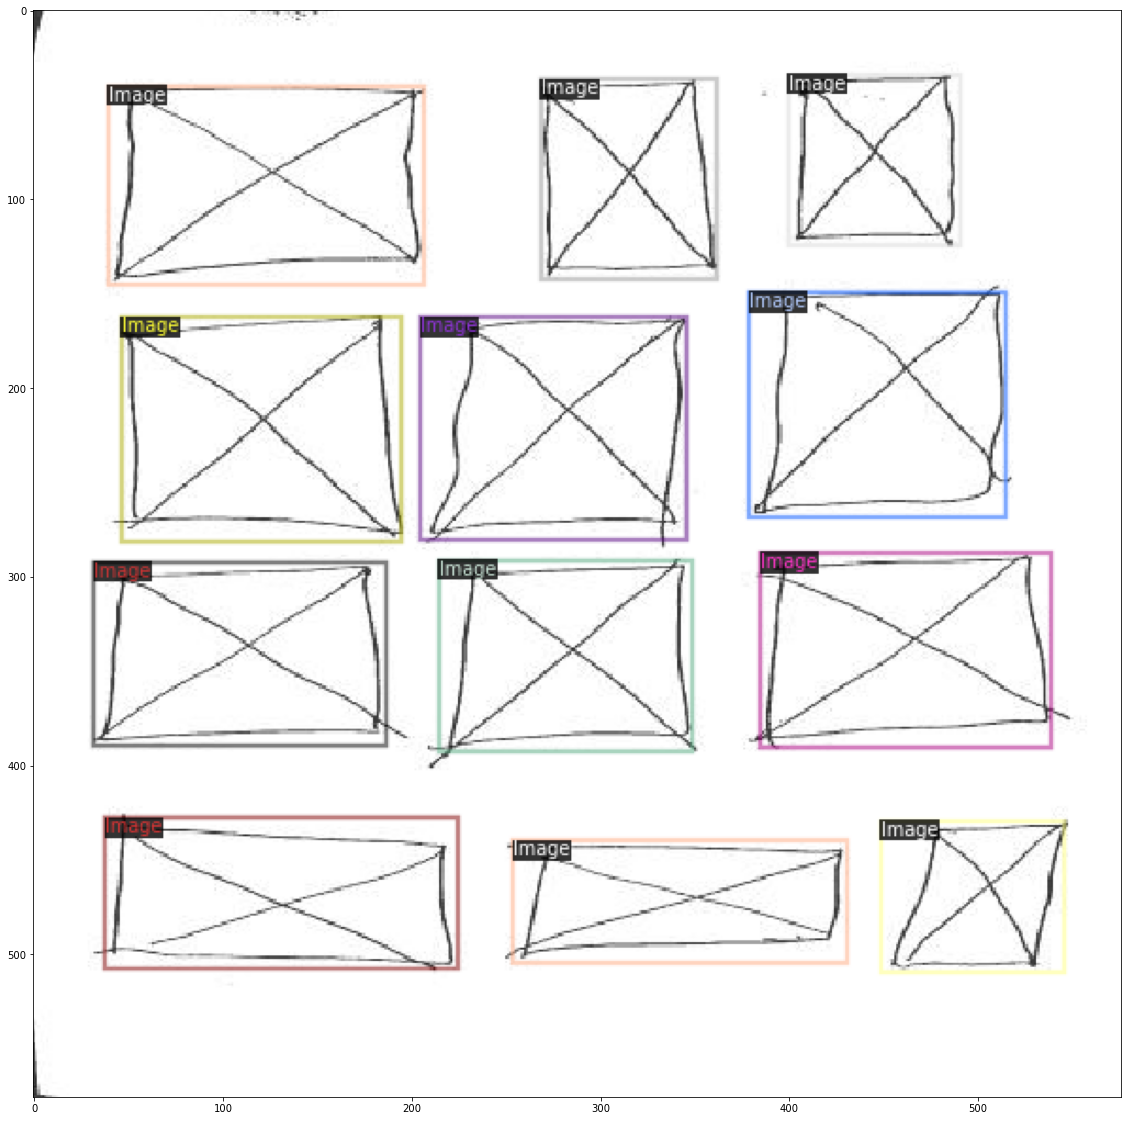

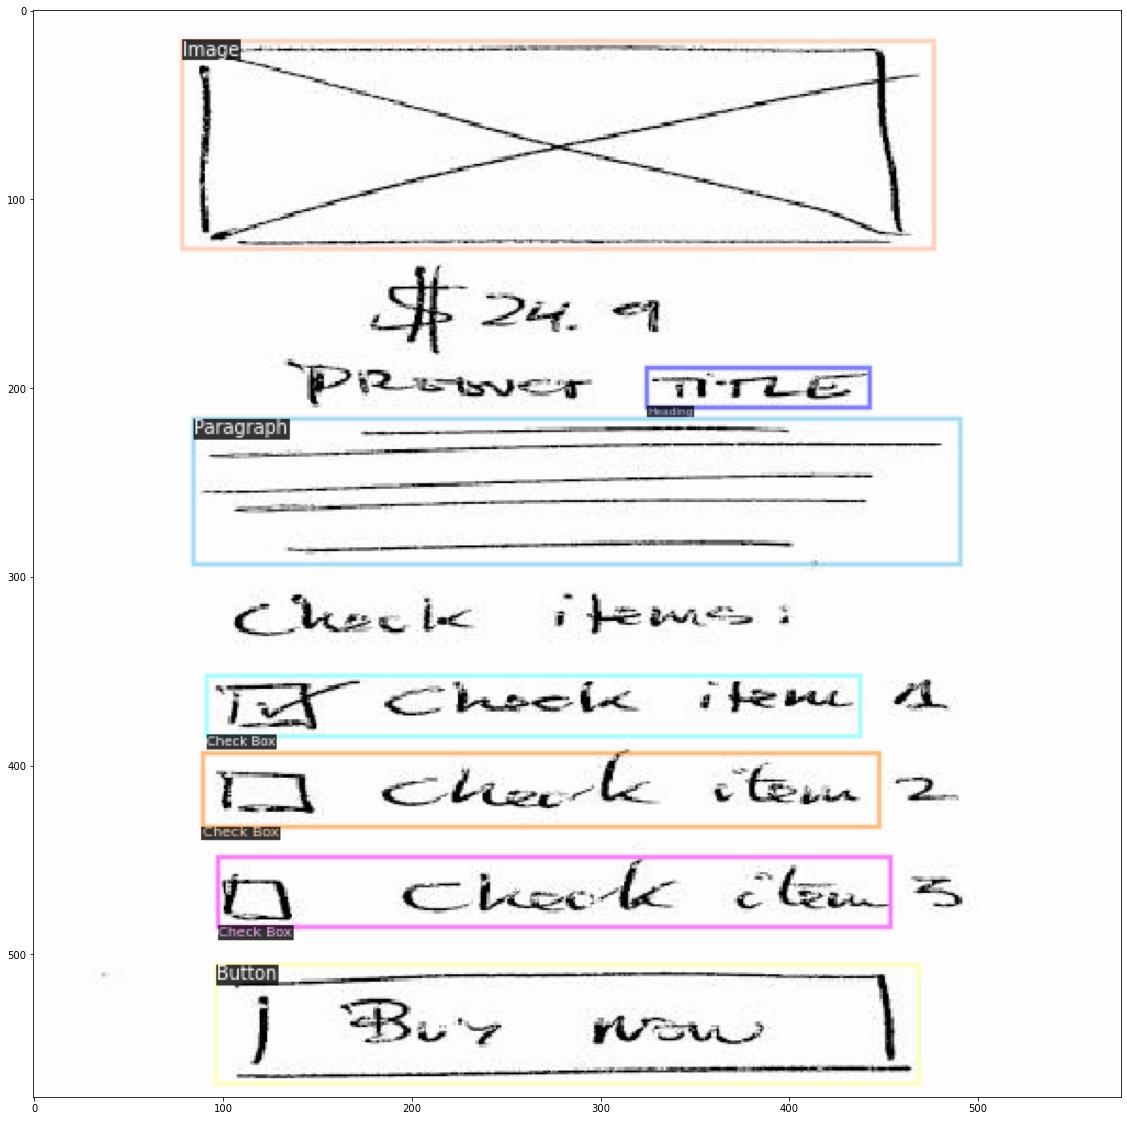

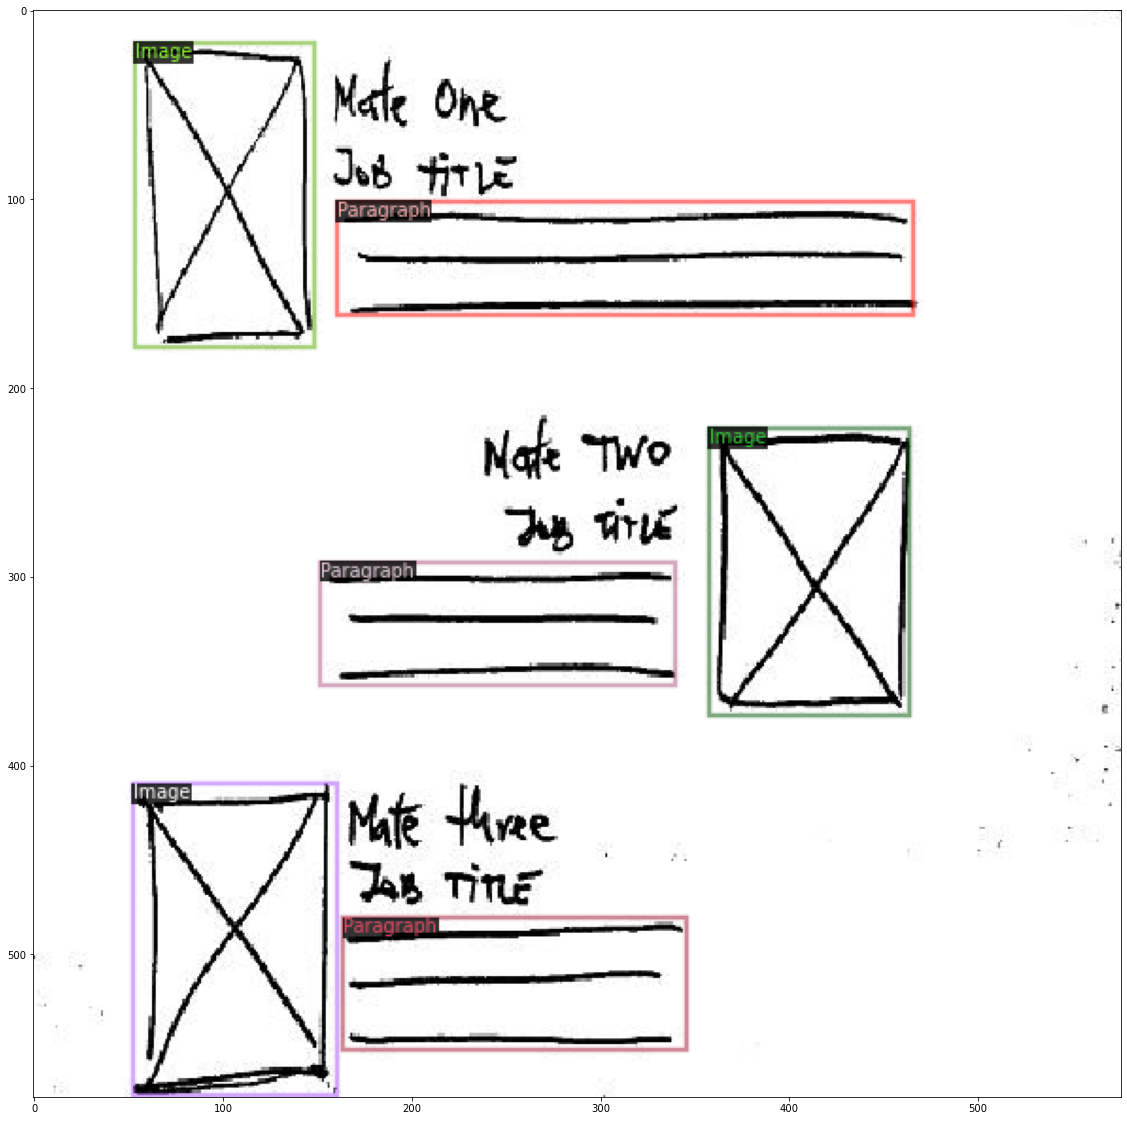

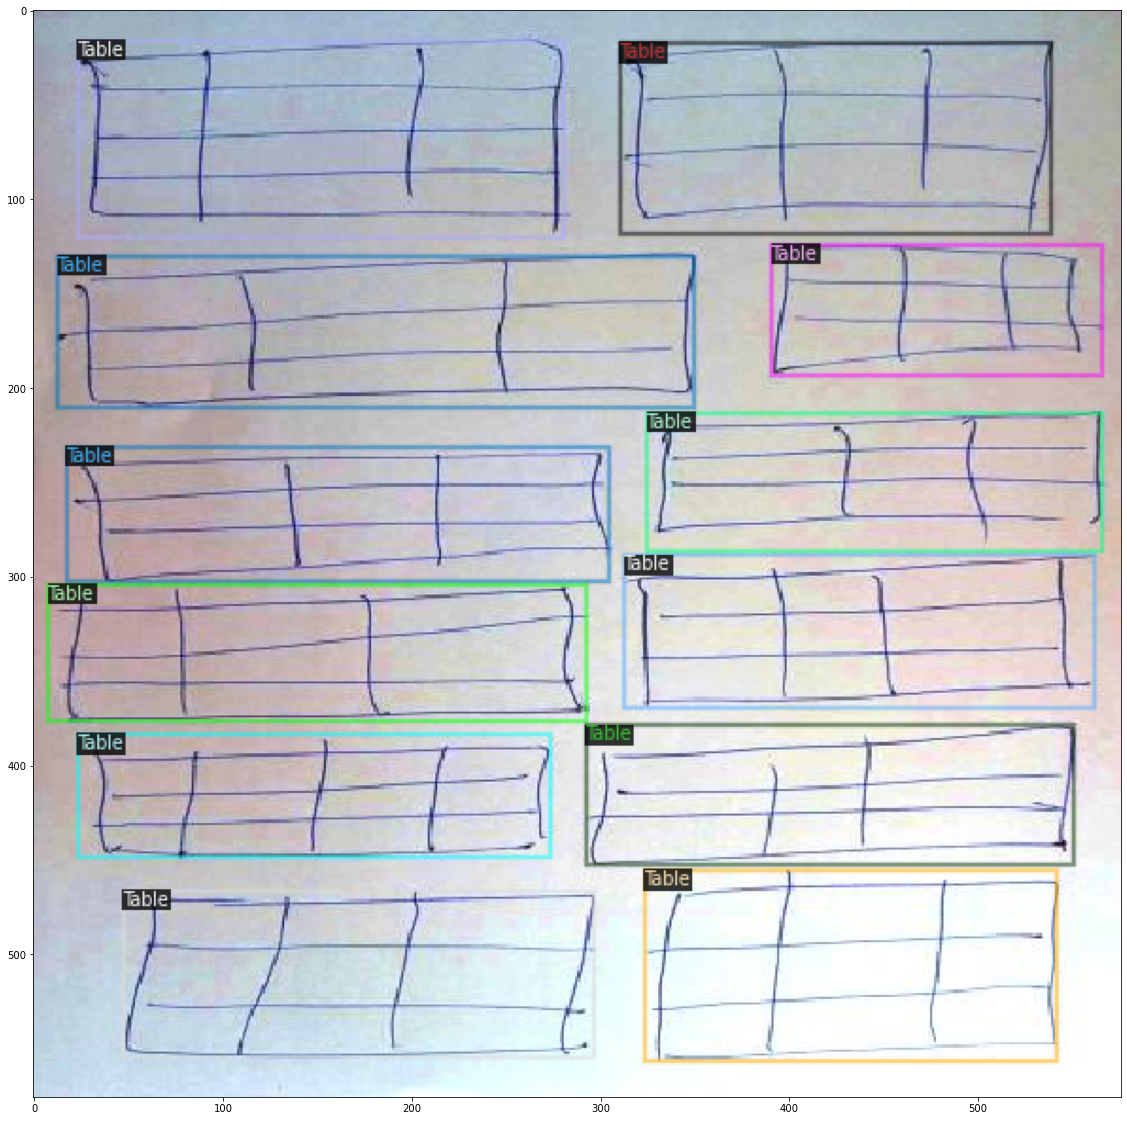

In [12]:
import random
# predictor = DefaultPredictor(cfg)


for d in random.sample(train_dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=1.2)
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize=(20,20))
    plt.imshow(vis.get_image())
    plt.show()

In [13]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("sketches_test", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "sketches_test")

print(inference_on_dataset(predictor.model, val_loader, evaluator))

[09/11 21:57:24 d2.data.datasets.coco]: Loaded 112 images in COCO format from data/test_annotations.coco.json
[09/11 21:57:24 d2.data.build]: Distribution of instances among all 14 categories:
|   category   | #instances   |  category  | #instances   |  category  | #instances   |
|:------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|    Button    | 226          |  Carousel  | 58           | Check Box  | 260          |
|   Heading    | 146          |   Image    | 152          |   Label    | 126          |
|     Link     | 104          | Pagination | 138          | Paragraph  | 130          |
| Radio Button | 106          |   Select   | 80           |   Table    | 70           |
|   Textarea   | 114          |  Textbox   | 190          |            |              |
|    total     | 1900         |            |              |            |              |
[09/11 21:57:24 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShorte